In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
data = pd.read_csv("sensor.csv", parse_dates=True)

In [25]:
del data['Unnamed: 0']

In [26]:
data.index

RangeIndex(start=0, stop=220320, step=1)

In [27]:
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]*100

calc_percent_NAs(data).sort_values(['percent'], ascending=False)

,percent
sensor_15,100.000000
sensor_50,34.956881
sensor_51,6.982117
sensor_00,4.633261
sensor_07,2.474129
sensor_08,2.317992
sensor_06,2.177741
sensor_09,2.085603
sensor_01,0.167484
sensor_30,0.118464


In [28]:
data['sensor_50'].fillna((data['sensor_50'].mean()), inplace=True)
data['sensor_51'].fillna((data['sensor_51'].mean()), inplace=True)
data['sensor_00'].fillna((data['sensor_00'].mean()), inplace=True)
data['sensor_08'].fillna((data['sensor_08'].mean()), inplace=True)
data['sensor_07'].fillna((data['sensor_07'].mean()), inplace=True)
data['sensor_06'].fillna((data['sensor_06'].mean()), inplace=True)
data['sensor_09'].fillna((data['sensor_09'].mean()), inplace=True)

In [29]:
calc_percent_NAs(data).head(10)


,percent
sensor_15,100.000000
sensor_01,0.167484
sensor_30,0.118464
sensor_29,0.032680
sensor_32,0.030864
sensor_17,0.020879
sensor_18,0.020879
sensor_22,0.018609
sensor_25,0.016340
sensor_16,0.014070


In [30]:
df= data

In [41]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       220320 non-null  float64
 1   sensor_01       219951 non-null  float64
 2   sensor_02       220301 non-null  float64
 3   sensor_03       220301 non-null  float64
 4   sensor_04       220301 non-null  float64
 5   sensor_05       220301 non-null  float64
 6   sensor_06       220320 non-null  float64
 7   sensor_07       220320 non-null  float64
 8   sensor_08       220320 non-null  float64
 9   sensor_09       220320 non-null  float64
 10  sensor_10       220301 non-null  float64
 11  sensor_11       220301 non-null  float64
 12  sensor_12       220301 non-null  float64
 13  sensor_13       220301 non-null  float64
 14  sensor_14       220299 non-null  float64
 15  sensor_15       0 non-null       float64
 16  sensor_16       220289

In [43]:
df.head()


,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [44]:
df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [45]:
dfBroken = df[df['machine_status']=='BROKEN']
dfBroken

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:55:00,0.000000,53.342010,52.821180,43.402775,202.526031,49.79289,3.219039,16.890910,16.869210,15.082470,...,50.78125,50.92593,51.215280,50.636570,46.006940,409.143500,121.527800,401.909700,324.652800,BROKEN
2018-04-18 00:30:00,1.093982,42.534720,47.699650,41.449650,206.038757,60.30106,12.304690,15.154800,14.185470,13.867190,...,42.70833,34.72222,31.539350,34.432870,33.275460,59.895830,44.560180,177.662000,183.738400,BROKEN
2018-05-19 03:18:00,2.258796,47.265630,52.734370,43.446178,200.115738,66.14643,13.592300,15.914350,15.147570,14.793110,...,39.06250,35.01157,37.905090,39.062500,45.428240,144.675900,49.768520,246.238400,257.523100,BROKEN
2018-05-25 00:30:00,2.321759,47.482640,51.475693,42.795135,612.152800,67.30158,14.062500,16.608800,15.943290,15.596060,...,202.34370,65.68287,57.870370,127.893500,153.935200,155.381900,65.682870,220.196800,267.361100,BROKEN
2018-06-28 22:00:00,0.364005,40.190970,45.225690,40.190971,201.368622,0.00000,11.335360,15.270540,15.183740,15.118630,...,32.29166,28.06713,28.067129,29.513889,29.224537,29.224537,29.513889,32.407406,202.699667,BROKEN
2018-07-08 00:11:00,0.001968,45.138890,52.907990,45.355900,500.000000,1.40131,0.028935,0.036169,0.036169,0.007234,...,36.19791,37.32639,35.300930,38.194440,43.402780,99.537030,44.849540,192.129600,174.768500,BROKEN
2018-07-25 14:00:00,2.318808,45.833332,52.994790,43.880210,420.503448,72.52040,14.185470,16.247110,15.697340,15.053530,...,51.30208,52.10200,52.662040,67.129630,43.981480,230.324100,69.733800,183.049260,205.729200,BROKEN


In [46]:
dfSensors = df.drop(['machine_status'], axis=1)
dfSensors

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889
2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889
2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.31940,203.7037
2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.45140,203.1250
2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.18750,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,183.04926,231.1921
2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,183.04926,231.1921
2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,183.04926,232.0602


In [47]:
sensorNames=dfSensors.columns
sensorNames

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51'],
      dtype='object')

In [48]:
dfSensor16 = df.drop(['machine_status','sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_00', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51'], axis=1)
dfSensor16

,sensor_16
timestamp,
2018-04-01 00:00:00,461.8781
2018-04-01 00:01:00,461.8781
2018-04-01 00:02:00,462.7798
2018-04-01 00:03:00,462.8980
2018-04-01 00:04:00,461.4906
...,...
2018-08-31 23:55:00,463.2318
2018-08-31 23:56:00,463.1928
2018-08-31 23:57:00,462.4065


In [49]:

from statsmodels.tsa.seasonal import STL
data = dfSensor16.resample('D').mean().ffill() # D-days, M-month, A-DEC- anual, Q-DEC-quarterly
# Remove freq info
#data.index = [i for i in range(data.shape[0])]
res = STL(data, period=15).fit()
#res.plot()
#plt.show()

In [50]:
stl = STL(dfSensor16)
result = stl.fit()

ValueError: freq T not understood. Please report if you think this is in error.

In [57]:
dfSensor16.index.month

Int64Index([4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
            ...
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='timestamp', length=220320)

In [51]:
seasonal, trend, resid = res.seasonal, res.trend, res.resid

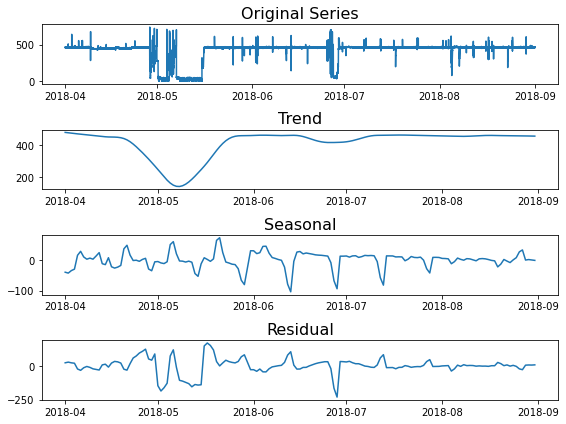

In [52]:
plt.figure(figsize=(8,6))

plt.subplot(4,1,1)
plt.plot(dfSensor16)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

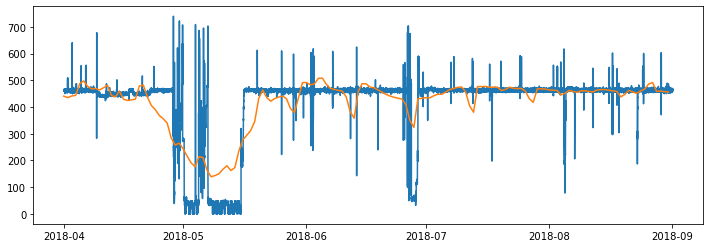

In [53]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(dfSensor16)
plt.plot(estimated)

In [54]:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

In [68]:
reside_mu

NameError: name 'reside_mu' is not defined

In [ ]:
#data filter

In [58]:
dfSensor16["2018-04-01":"2018-08-31"]

,sensor_16
timestamp,
2018-04-01 00:00:00,461.8781
2018-04-01 00:01:00,461.8781
2018-04-01 00:02:00,462.7798
2018-04-01 00:03:00,462.8980
2018-04-01 00:04:00,461.4906
...,...
2018-08-31 23:55:00,463.2318
2018-08-31 23:56:00,463.1928
2018-08-31 23:57:00,462.4065


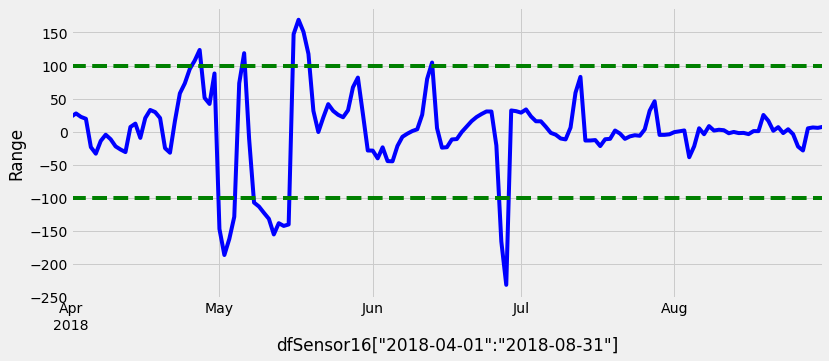

In [64]:
plt.style.use('fivethirtyeight')
ax = resid.plot(figsize =(12,5),color='blue', fontsize=14)
# Add a green horizontal line
ax.axhline(100, color='green', linestyle='--')
ax.axhline(-100, color='green', linestyle='--')
ax.set_xlabel('dfSensor16["2018-04-01":"2018-08-31"]')
ax.set_ylabel('Range')



plt.show()
plt.show()

In [67]:
anomalies = dfSensor16.loc[(resid < lower) | (resid > upper)]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).